In [1]:
# import all possible packages useful for multiple linear regression
import pandas as pd
import numpy as np
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
%matplotlib inline
from scipy import stats
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from numpy import array
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm
import os
os.getcwd()
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data set from hard drive
med = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D208\medical_clean.csv", skiprows=0, delimiter=",")

In [3]:
#examine the list of variables, their data type and the shape of the data
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#print the header 
med.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#change the dtype of categorical values to 'categorical'
med["Gender"] = med["Gender"].astype('category')
med['Services'] = med['Services'].astype('category')
med['Initial_admin'] = med['Initial_admin'].astype('category')
med['Marital'] = med['Marital'].astype('category')

In [6]:
#change the values of the ordinal categorical variable to numeric ranks
med['Complication_risk'].unique()
med['Complication_risk'] = med['Complication_risk'].map({'Low':0,'Medium':1,'High':2})

In [7]:
#change all binary categorical values to 0,1
med['Soft_drink'] = med['Soft_drink'].map({'No':0, "Yes":1})
med['HighBlood'] = med['HighBlood'].map({'No':0, "Yes":1})
med['Stroke'] = med['Stroke'].map({'No':0, "Yes":1})
med['Overweight'] = med['Overweight'].map({'No':0, "Yes":1})
med['Arthritis'] = med['Arthritis'].map({'No':0, "Yes":1})
med['Diabetes'] = med['Diabetes'].map({'No':0, "Yes":1})
med['Hyperlipidemia'] = med['Hyperlipidemia'].map({'No':0, "Yes":1})
med['BackPain'] = med['BackPain'].map({'No':0, "Yes":1})
med['Anxiety'] = med['Anxiety'].map({'No':0, "Yes":1})
med['Allergic_rhinitis'] = med['Allergic_rhinitis'].map({'No':0, "Yes":1})
med['Reflux_esophagitis'] = med['Reflux_esophagitis'].map({'No':0, "Yes":1})
med['Asthma'] = med['Asthma'].map({'No':0, "Yes":1})

In [8]:
#make the survey columns easier to understand
med.rename(columns ={'Item1':'S1_Timely_admission', 'Item2':'S2_Timely_Treatment', 'Item3':'S3_Timely_Visits', 'Item4':'S4_Reliability', 'Item5':'S5_Options', 'Item6':'S6_Hours_of_Treatment', 'Item7':'S7_Courteous_staff', 'Item8':'S8_Dr_Actively_Listened'}, inplace=True)

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

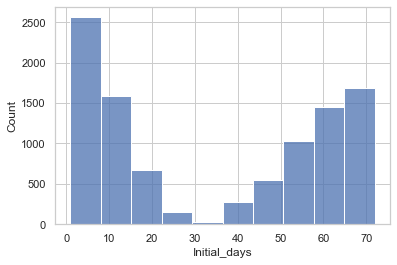

In [9]:
#visualize the distribution of each continuous (float64) variable in the data set. "Initial_days" is the most significant to the question, but as you can see is also the most normal distribution of the continuous variables.
sns.histplot(data=med, x="Initial_days", bins=10)

<AxesSubplot:xlabel='Income', ylabel='Count'>

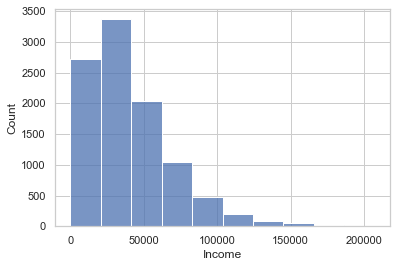

In [10]:
sns.histplot(data=med, x="Income", bins=10)

<AxesSubplot:xlabel='TotalCharge', ylabel='Count'>

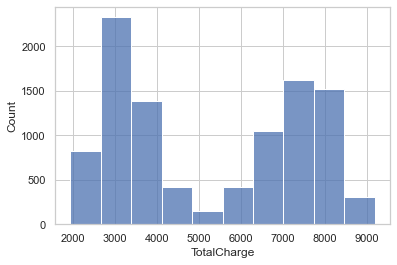

In [11]:
sns.histplot(data=med, x="TotalCharge", bins=10)

<AxesSubplot:xlabel='Additional_charges', ylabel='Count'>

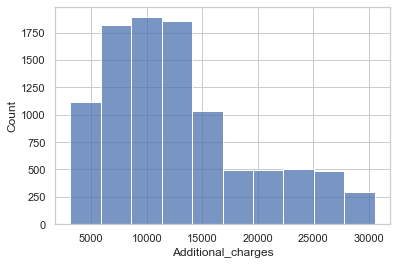

In [12]:
sns.histplot(data=med, x="Additional_charges", bins=10)

In [13]:
#Gross selection of data before PCA
da_df = med[["Initial_days", "Gender","Initial_admin", "Services", "Children", "Age", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "S1_Timely_admission", "S2_Timely_Treatment", "S3_Timely_Visits", "S4_Reliability", "S5_Options", "S6_Hours_of_Treatment", "S7_Courteous_staff", "S8_Dr_Actively_Listened" ]]

In [14]:
#look at the data types and what variables remain
da_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Initial_days             10000 non-null  float64 
 1   Gender                   10000 non-null  category
 2   Initial_admin            10000 non-null  category
 3   Services                 10000 non-null  category
 4   Children                 10000 non-null  int64   
 5   Age                      10000 non-null  int64   
 6   HighBlood                10000 non-null  int64   
 7   Stroke                   10000 non-null  int64   
 8   Complication_risk        10000 non-null  int64   
 9   Overweight               10000 non-null  int64   
 10  Arthritis                10000 non-null  int64   
 11  Diabetes                 10000 non-null  int64   
 12  Hyperlipidemia           10000 non-null  int64   
 13  BackPain                 10000 non-null  int64   
 14  Anxiety

In [15]:
#mean, median, and qaurtiles
da_df.describe()

,Initial_days,Children,Age,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,...,Reflux_esophagitis,Asthma,S1_Timely_admission,S2_Timely_Treatment,S3_Timely_Visits,S4_Reliability,S5_Options,S6_Hours_of_Treatment,S7_Courteous_staff,S8_Dr_Actively_Listened
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.455299,2.097200,53.511700,0.409000,0.199300,1.123300,0.709400,0.357400,0.27380,0.337200,...,0.413500,0.28930,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,26.309341,2.163659,20.638538,0.491674,0.399494,0.730172,0.454062,0.479258,0.44593,0.472777,...,0.492486,0.45346,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.001981,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.896215,0.000000,36.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,35.836244,1.000000,53.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,61.161020,3.000000,71.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,71.981490,10.000000,89.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.00000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


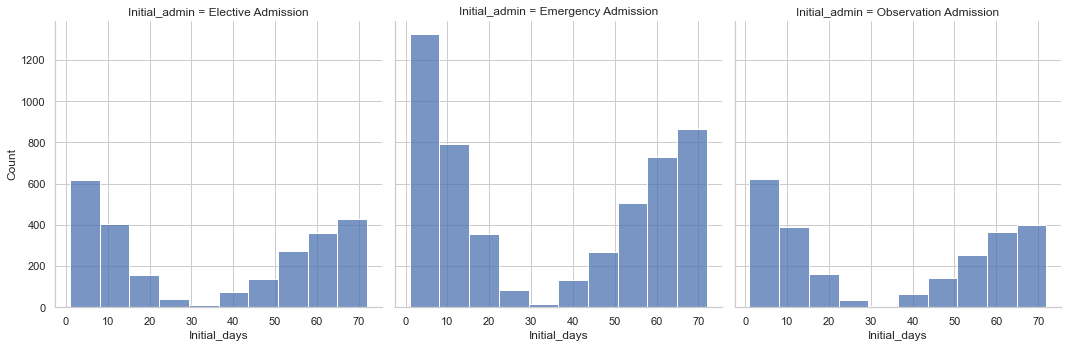

In [16]:
#Create histograms of the number of initial days for each explanatory variable
sns.displot(data=da_df, x="Initial_days", col="Initial_admin", col_wrap=3, bins=10)
plt.show()

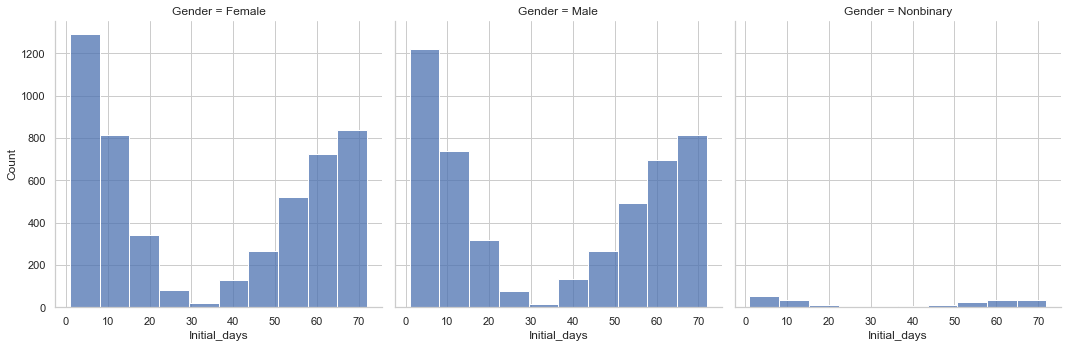

In [17]:
sns.displot(data=da_df, x="Initial_days", col="Gender", col_wrap=3, bins=10)
plt.show()

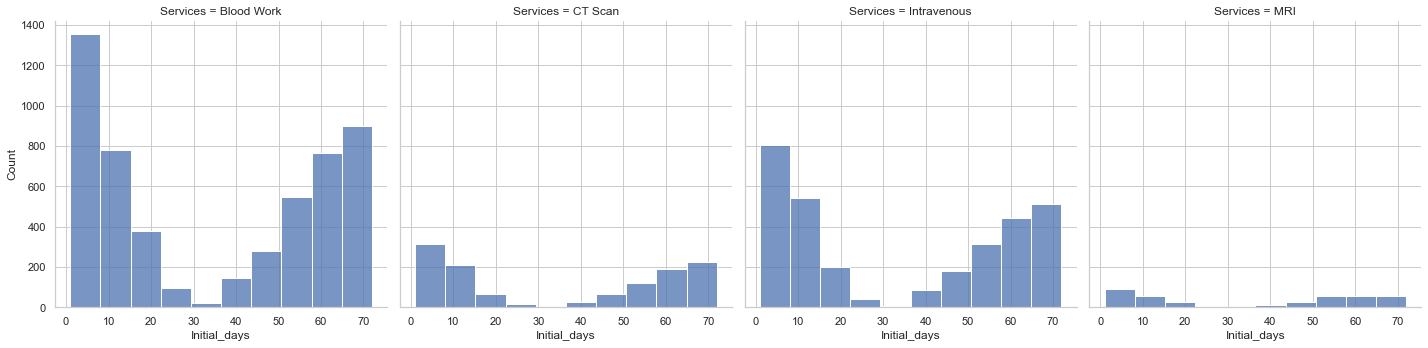

In [18]:
sns.displot(data=da_df, x="Initial_days", col="Services", col_wrap=4, bins=10)
plt.show()

In [19]:
# VIF for demographic data. Adding gender columns returned an error when mixed with marital
X = da_df[['Children', 'Age']]
vif_demo_data = pd.DataFrame()
vif_demo_data['Demographic'] = X.columns
vif_demo_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]
print(vif_demo_data)

  Demographic       VIF
0    Children  1.739175
1         Age  1.739175


In [20]:
X2 = da_df[['S1_Timely_admission', 'S2_Timely_Treatment','S3_Timely_Visits','S4_Reliability','S5_Options', 'S6_Hours_of_Treatment','S7_Courteous_staff','S8_Dr_Actively_Listened']]
vif_surv_data = pd.DataFrame()
vif_surv_data['Demographic'] = X2.columns
vif_surv_data["VIF"] = [variance_inflation_factor(X2.values, i)
    for i in range(len(X2.columns))]
print(vif_surv_data)

               Demographic        VIF
0      S1_Timely_admission  27.864918
1      S2_Timely_Treatment  23.503306
2         S3_Timely_Visits  19.763417
3           S4_Reliability  11.129393
4               S5_Options   7.693226
5    S6_Hours_of_Treatment  18.188254
6       S7_Courteous_staff  15.581837
7  S8_Dr_Actively_Listened  13.865512


In [21]:
#Drop columns with a VIF > 10 leaving only 1 to represent the data
da_df = da_df.drop(columns=['S1_Timely_admission', 'S2_Timely_Treatment','S3_Timely_Visits','S4_Reliability','S5_Options', 'S6_Hours_of_Treatment','S7_Courteous_staff','S8_Dr_Actively_Listened'])

In [22]:
#Look over remaining variables and check dtypes
da_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Initial_days        10000 non-null  float64 
 1   Gender              10000 non-null  category
 2   Initial_admin       10000 non-null  category
 3   Services            10000 non-null  category
 4   Children            10000 non-null  int64   
 5   Age                 10000 non-null  int64   
 6   HighBlood           10000 non-null  int64   
 7   Stroke              10000 non-null  int64   
 8   Complication_risk   10000 non-null  int64   
 9   Overweight          10000 non-null  int64   
 10  Arthritis           10000 non-null  int64   
 11  Diabetes            10000 non-null  int64   
 12  Hyperlipidemia      10000 non-null  int64   
 13  BackPain            10000 non-null  int64   
 14  Anxiety             10000 non-null  int64   
 15  Allergic_rhinitis   10000 non-null  i

In [23]:
#Gather a sample to start checking statistical data
np.random.seed(944)
data = da_df.sample(100)

In [24]:
#Perform PCA
from sklearn.decomposition import PCA

med_pca = da_df[["Initial_days","Children", "Age", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
med_normalized = (med_pca-med_pca.mean())/med_pca.std()
pca = PCA(n_components = med_pca.shape[1])
pca.fit(med_normalized)
loadings = pd.DataFrame(pca.components_.T, 
columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4','PCA5','PCA6', 'PCA7', 'PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14', 'PCA15'],
index=med_normalized.columns)
loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
Initial_days,0.531584,0.106502,-0.205587,0.101783,0.138419,-0.097650,-0.199863,-0.019852,-0.174829,0.363528,-0.108939,-0.216260,0.497214,-0.339672,-0.021530
Children,0.409629,-0.080390,0.364900,-0.023728,0.329222,0.202524,0.051884,0.115127,-0.204304,0.257768,-0.197436,0.426722,-0.120700,0.416390,0.097319
Age,0.227805,0.361918,0.259752,0.200997,0.011934,-0.425006,-0.186912,0.179931,-0.068329,-0.479013,-0.204453,0.002628,-0.129772,0.021937,-0.409771
HighBlood,-0.185176,0.384670,0.048198,-0.311219,0.377000,0.045394,-0.157880,0.281174,0.002786,0.067095,0.379410,0.365491,-0.049536,-0.431144,0.000825
Stroke,-0.099824,0.105479,0.307455,0.348769,0.323544,0.088906,-0.320177,-0.409089,0.069900,-0.135470,0.428126,-0.166645,0.244273,0.249413,0.155278
Complication_risk,-0.243172,-0.065586,0.156783,-0.173896,0.517054,-0.281115,0.149398,0.281534,0.235265,0.043282,-0.334588,-0.445012,0.086977,0.067422,0.233399
Overweight,-0.343524,0.309128,-0.088908,-0.162817,-0.075922,0.307917,-0.252523,0.164896,-0.465223,0.188264,-0.118884,-0.305325,0.053727,0.353129,-0.271407
Arthritis,0.361387,0.053087,-0.148024,-0.528560,-0.077014,0.122701,-0.279594,-0.011555,-0.046355,-0.463929,0.023602,-0.164986,-0.064183,0.114213,0.451311
Diabetes,0.195115,-0.075950,0.552369,-0.102442,-0.255331,0.232426,-0.154763,0.095171,0.239354,0.266454,0.129199,-0.406340,-0.318165,-0.247365,-0.125777
Hyperlipidemia,0.000238,-0.303436,0.049321,0.144992,-0.265114,-0.156950,-0.155702,0.684117,-0.004910,-0.020798,0.357500,0.059980,0.329115,0.209432,0.115127


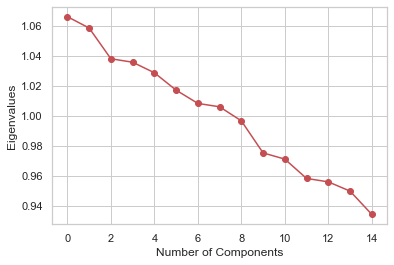

In [25]:
#Create a covariance matrix to decide which PCAs to keep
cov_matrix = np.dot(med_normalized.T, med_normalized)/med_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.plot(eigenvalues, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

In [26]:
#Standardize the data so that all the variables are uniform in comparison
x = data[["Children", "Age", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = data["Initial_days"]
x_data=x
target=y
scaled_data=preprocessing.scale(x_data)

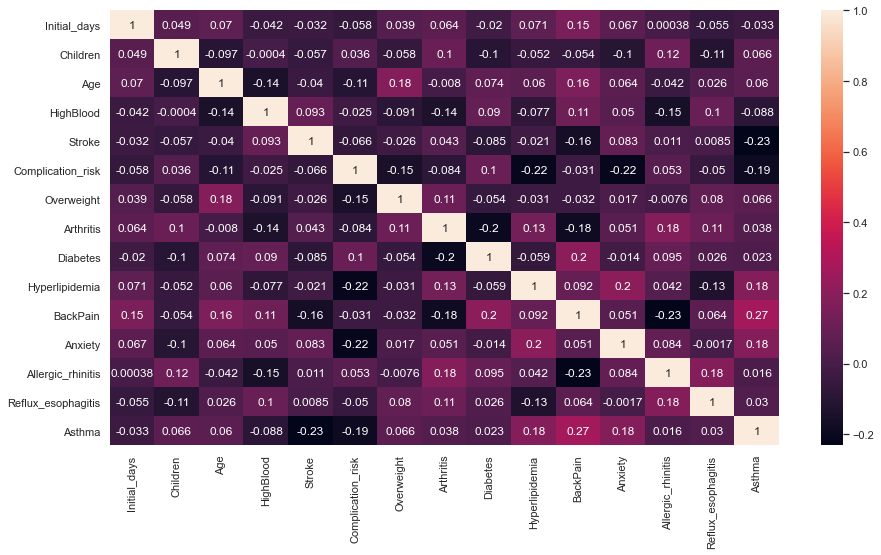

In [27]:
#heatmap to view correlation
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot=True)
plt.show()

In [28]:
#Check Pearson correlation
data.corr(method='pearson')

,Initial_days,Children,Age,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
Initial_days,1.000000,0.048741,0.069838,-0.041640,-0.031941,-0.058143,0.039444,0.063644,-0.020199,0.070810,0.152039,0.066882,0.000380,-0.054674,-0.032511
Children,0.048741,1.000000,-0.097349,-0.000404,-0.056534,0.036475,-0.058363,0.104660,-0.100780,-0.051506,-0.053916,-0.101805,0.116922,-0.111218,0.066223
Age,0.069838,-0.097349,1.000000,-0.144473,-0.040353,-0.107163,0.180516,-0.007975,0.073983,0.059896,0.162389,0.063697,-0.041685,0.026029,0.059545
HighBlood,-0.041640,-0.000404,-0.144473,1.000000,0.093479,-0.024613,-0.090690,-0.138991,0.089898,-0.076875,0.110694,0.049842,-0.149961,0.099577,-0.088301
Stroke,-0.031941,-0.056534,-0.040353,0.093479,1.000000,-0.065983,-0.026262,0.042735,-0.084826,-0.021427,-0.163218,0.083096,0.010884,0.008497,-0.228968
Complication_risk,-0.058143,0.036475,-0.107163,-0.024613,-0.065983,1.000000,-0.149192,-0.084461,0.103853,-0.216365,-0.030835,-0.216365,0.052630,-0.049779,-0.190658
Overweight,0.039444,-0.058363,0.180516,-0.090690,-0.026262,-0.149192,1.000000,0.109725,-0.053665,-0.030723,-0.032161,0.017282,-0.007617,0.080000,0.066192
Arthritis,0.063644,0.104660,-0.007975,-0.138991,0.042735,-0.084461,0.109725,1.000000,-0.198979,0.133762,-0.183191,0.050937,0.179470,0.106044,0.037761
Diabetes,-0.020199,-0.100780,0.073983,0.089898,-0.084826,0.103853,-0.053665,-0.198979,1.000000,-0.059190,0.201650,-0.014007,0.094545,0.025711,0.023111
Hyperlipidemia,0.070810,-0.051506,0.059896,-0.076875,-0.021427,-0.216365,-0.030723,0.133762,-0.059190,1.000000,0.092350,0.201345,0.042102,-0.129848,0.180421


<AxesSubplot:xlabel='Age', ylabel='Initial_days'>

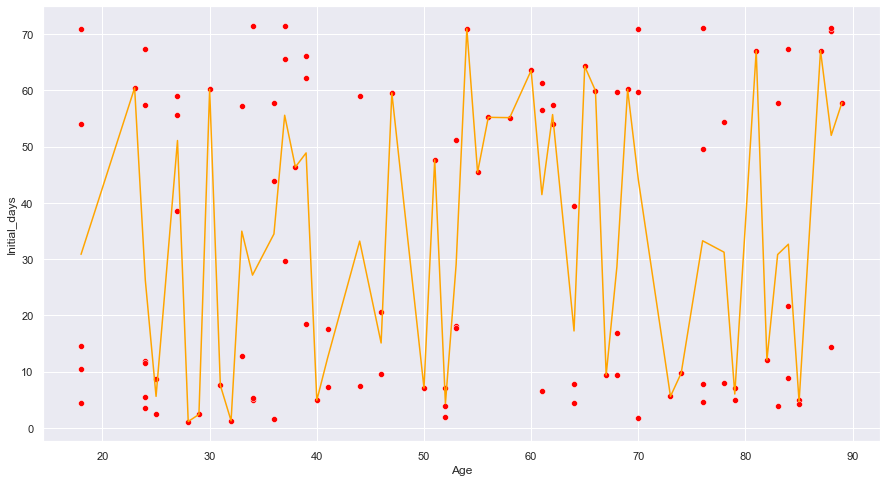

In [29]:
#Create bivariate visualizations of the data
sns.scatterplot(data=data, x='Age', y="Initial_days", color="Red")
sns.lineplot(data=data, x='Age', y="Initial_days", ci=None,color="Orange")

<AxesSubplot:xlabel='Children', ylabel='Initial_days'>

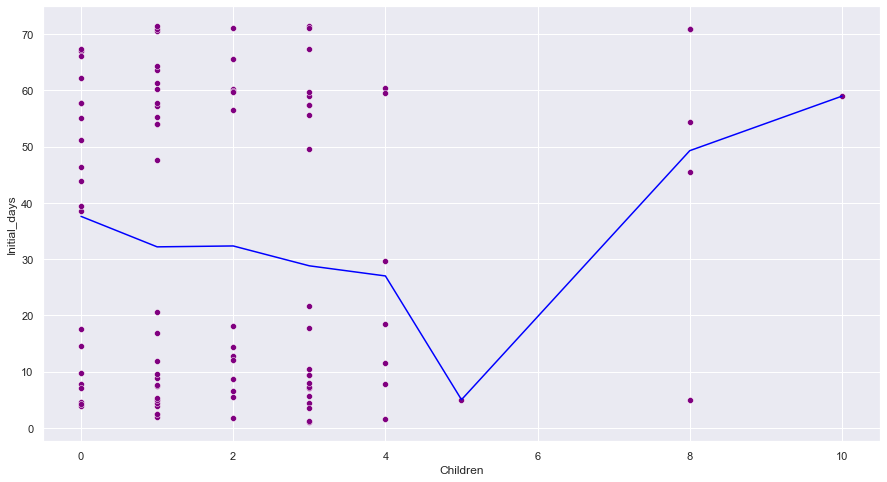

In [30]:
sns.scatterplot(data=data, x='Children', y="Initial_days", color="purple")
sns.lineplot(data=data, x='Children', y="Initial_days", ci=None,color="Blue")

<AxesSubplot:xlabel='Stroke', ylabel='Initial_days'>

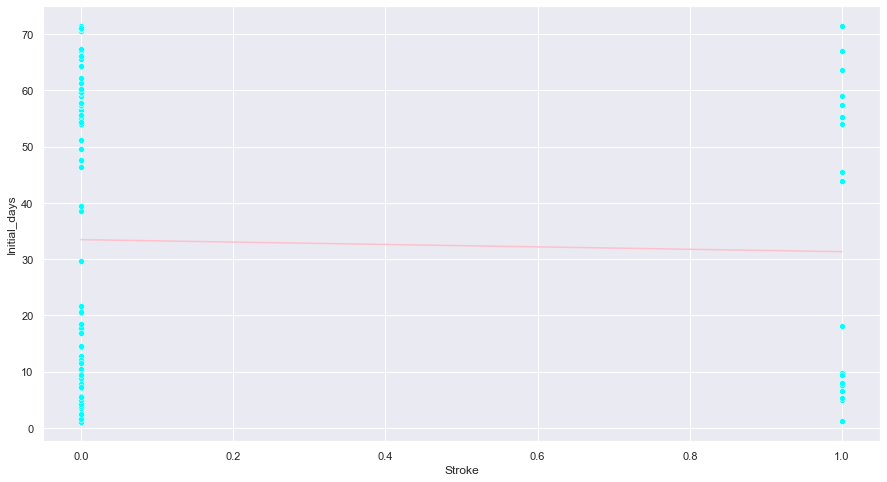

In [31]:
sns.scatterplot(data=data, x='Stroke', y="Initial_days", color="aqua")
sns.lineplot(data=data, x='Stroke', y="Initial_days", ci=None,color="pink")

<AxesSubplot:xlabel='Complication_risk', ylabel='Initial_days'>

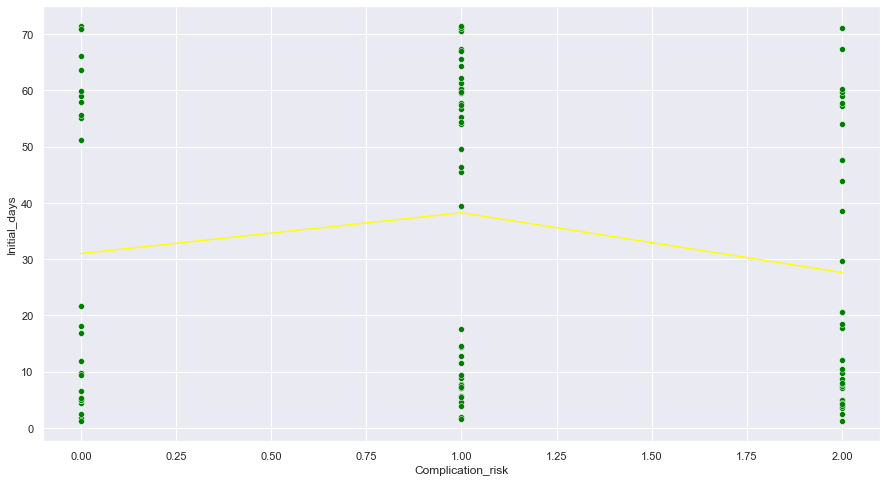

In [32]:
sns.scatterplot(data=data, x='Complication_risk', y="Initial_days", color="green")
sns.lineplot(data=data, x='Complication_risk', y="Initial_days", ci=None,color="yellow")

<AxesSubplot:xlabel='Overweight', ylabel='Initial_days'>

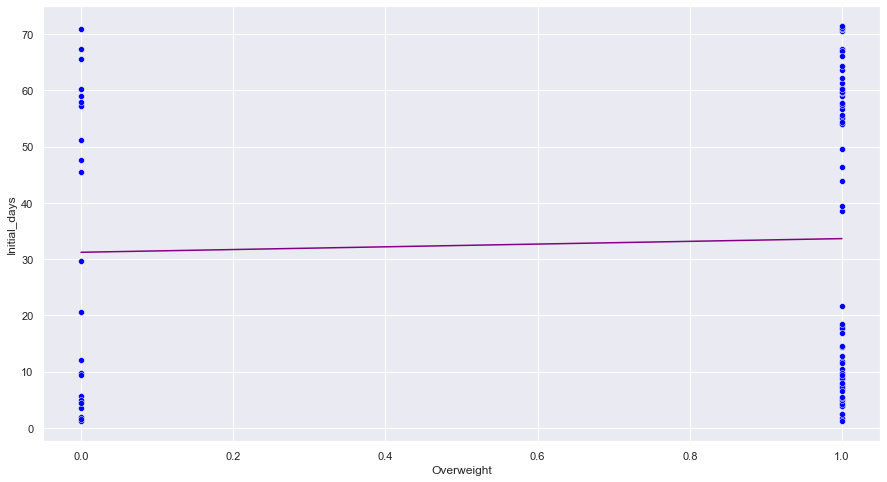

In [33]:
sns.scatterplot(data=data, x='Overweight', y="Initial_days", color="blue")
sns.lineplot(data=data, x='Overweight', y="Initial_days", ci=None,color="purple")

<AxesSubplot:xlabel='Arthritis', ylabel='Initial_days'>

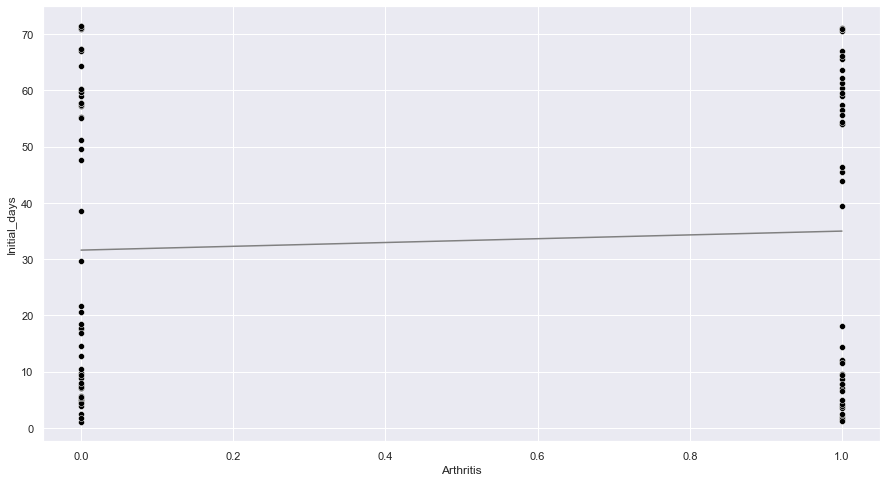

In [34]:
sns.scatterplot(data=data, x='Arthritis', y="Initial_days", color="black")
sns.lineplot(data=data, x='Arthritis', y="Initial_days", ci=None,color="grey")

<AxesSubplot:xlabel='Hyperlipidemia', ylabel='Initial_days'>

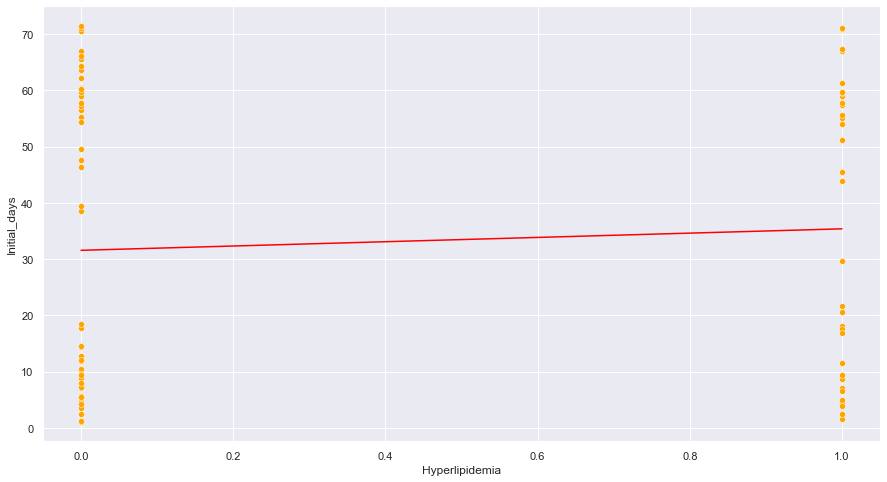

In [35]:
sns.scatterplot(data=data, x='Hyperlipidemia', y="Initial_days", color="orange")
sns.lineplot(data=data, x='Hyperlipidemia', y="Initial_days", ci=None,color="red")

<AxesSubplot:xlabel='Diabetes', ylabel='Initial_days'>

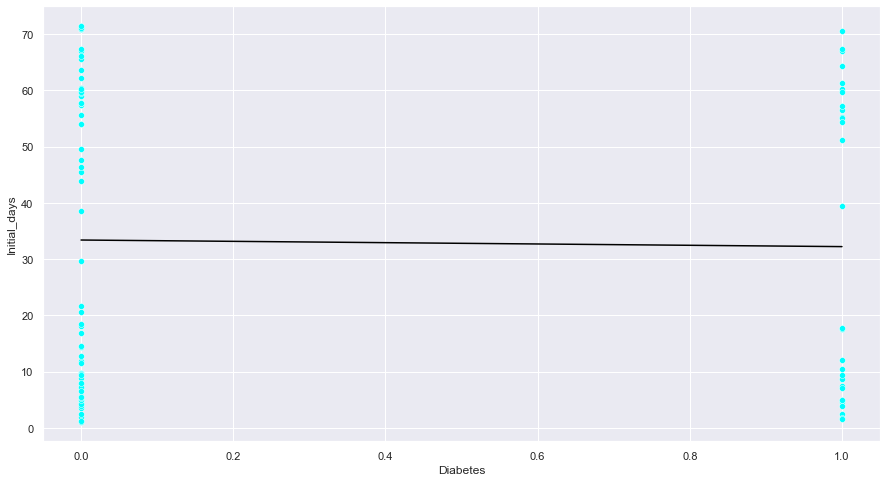

In [36]:
sns.scatterplot(data=data, x='Diabetes', y="Initial_days", color="aqua")
sns.lineplot(data=data, x='Diabetes', y="Initial_days", ci=None,color="black")

<AxesSubplot:xlabel='Allergic_rhinitis', ylabel='Initial_days'>

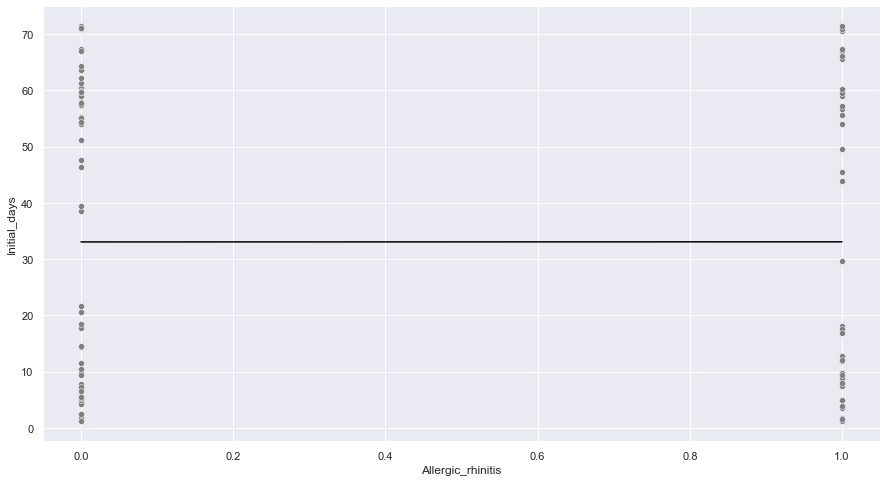

In [37]:
sns.scatterplot(data=data, x='Allergic_rhinitis', y="Initial_days", color="grey")
sns.lineplot(data=data, x='Allergic_rhinitis', y="Initial_days", ci=None,color="black")

<AxesSubplot:xlabel='Reflux_esophagitis', ylabel='Initial_days'>

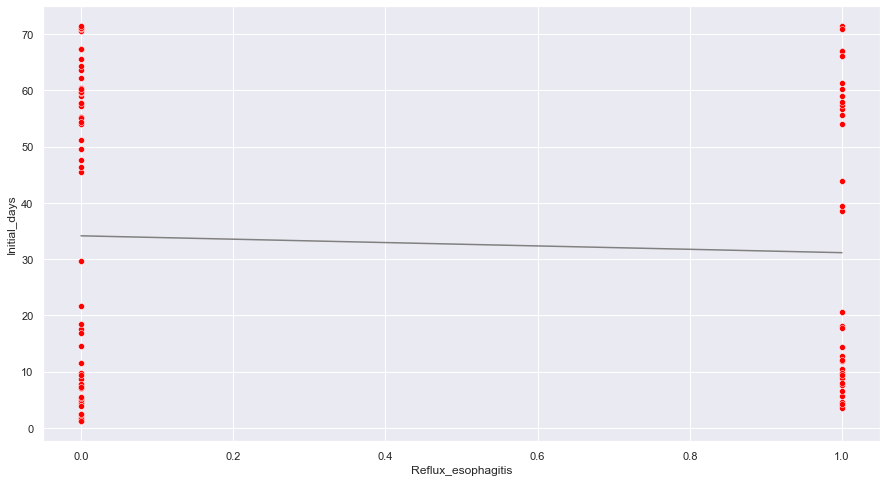

In [38]:
sns.scatterplot(data=data, x='Reflux_esophagitis', y="Initial_days", color="red")
sns.lineplot(data=data, x='Reflux_esophagitis', y="Initial_days", ci=None,color="grey")

<AxesSubplot:xlabel='BackPain', ylabel='Initial_days'>

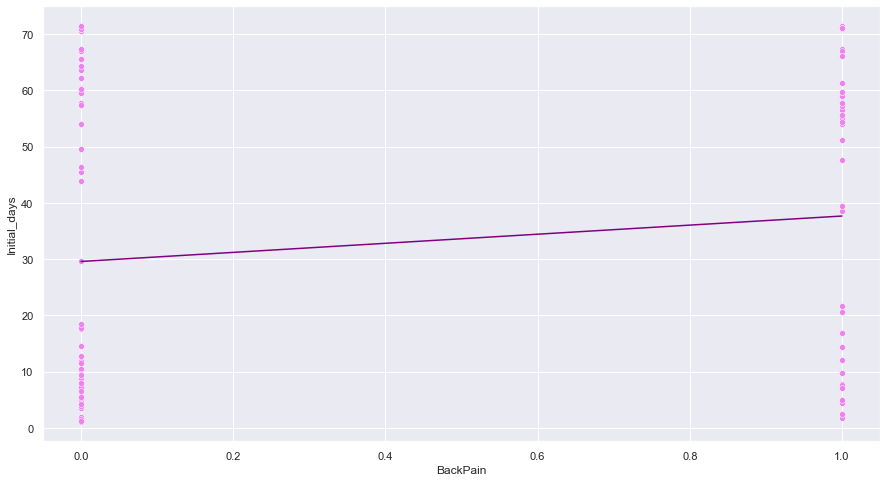

In [39]:
sns.scatterplot(data=data, x='BackPain', y="Initial_days", color="violet")
sns.lineplot(data=data, x='BackPain', y="Initial_days", ci=None,color="purple")

In [40]:
#Perform Recursive Feature Extraction to select which variables have the most statistical significance to "Initial_days"
np.random.seed(944)
x = data[["Children", "Age", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = data["Initial_days"]
estimator = AdaBoostRegressor(random_state=0, n_estimators=100)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(x, y)
filter = selector.support_
ranking = selector.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking)

Mask data:  [ True  True False False  True False False False False  True False False
  True False]
Ranking:  [ 1  1  9  7  1  6 10  3  5  1  4  8  1  2]


In [41]:
#print RFE
features = array(x.columns.values)
print("All features:")
print(features)

print("Selected features:")
print(features[filter])

All features:
['Children' 'Age' 'HighBlood' 'Stroke' 'Complication_risk' 'Overweight'
 'Arthritis' 'Diabetes' 'Hyperlipidemia' 'BackPain' 'Anxiety'
 'Allergic_rhinitis' 'Reflux_esophagitis' 'Asthma']
Selected features:
['Children' 'Age' 'Complication_risk' 'BackPain' 'Reflux_esophagitis']


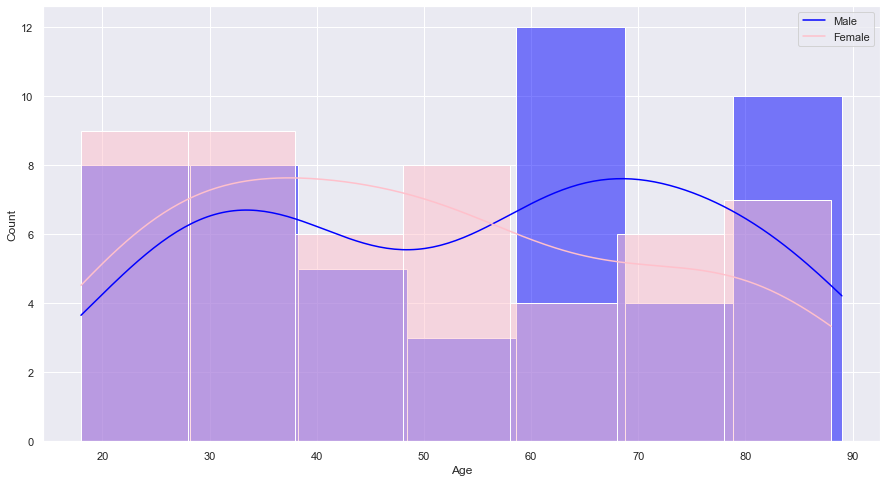

In [42]:
#Standardize the data so that all the variables are uniform in comparison
M = data[data['Gender']=='Male']
F = data[data["Gender"]=='Female']
sns.histplot(data=M, x='Age', kde=True, color="Blue")
sns.histplot(data=F, x='Age', kde=True, color='Pink')
plt.legend(labels=["Male", "Female"], bbox_to_anchor=(1,1))

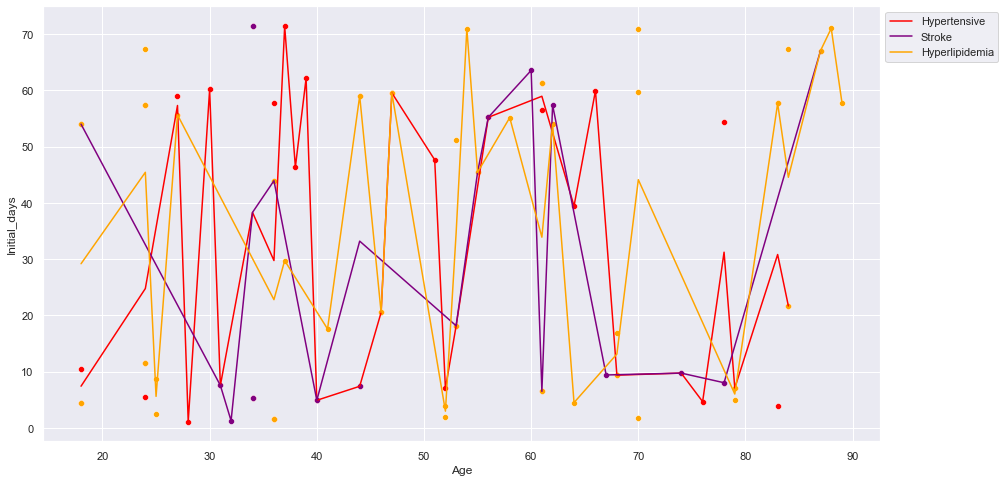

In [43]:
#Use scatterplot with lineplot to visualize any relationship between Age and Iniital_days against medical conditions
BP = data[data["HighBlood"]==1]
stroke= data[data['Stroke']==1]
hyper = data[data['Hyperlipidemia']==1]
sns.scatterplot(data=BP, x='Age', y="Initial_days", color="Red")
sns.scatterplot(data=stroke, x='Age', y="Initial_days", color="Purple")
sns.scatterplot(data=hyper, x='Age', y='Initial_days', color="Orange")
sns.lineplot(data=BP, x='Age', y="Initial_days", ci=None,color="Red")
sns.lineplot(data=stroke, x='Age', y="Initial_days", ci=None, color="Purple")
sns.lineplot(data=hyper, x='Age', y='Initial_days', ci=None, color="Orange")
plt.legend(labels=["Hypertensive","Stroke", "Hyperlipidemia"], bbox_to_anchor=(1,1))

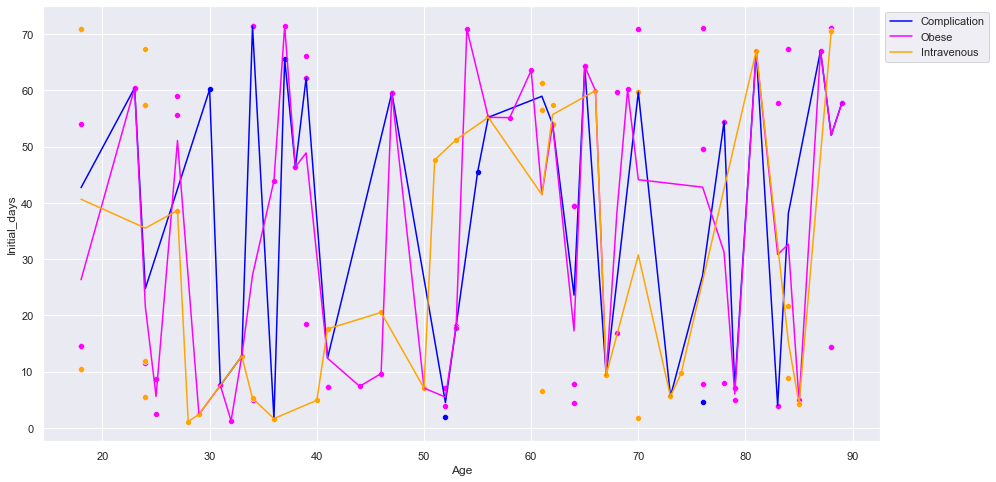

In [44]:
complication = data[data['Complication_risk']==1]
obese = data[data['Overweight']==1]
intra = data[data['Services']=='Intravenous']

sns.scatterplot(data=complication, x='Age', y="Initial_days", color="Blue")
sns.scatterplot(data=obese, x='Age', y='Initial_days', color="Magenta")
sns.scatterplot(data=intra, x='Age', y='Initial_days', color='Orange')

sns.lineplot(data=complication, x='Age', y="Initial_days", ci=None, color="Blue")
sns.lineplot(data=obese, x='Age', y="Initial_days", ci=None, color="Magenta")
sns.lineplot(data=intra, x='Age', y='Initial_days', ci=None, color='Orange')

plt.legend(labels=['Complication','Obese', 'Intravenous'], bbox_to_anchor=(1,1))

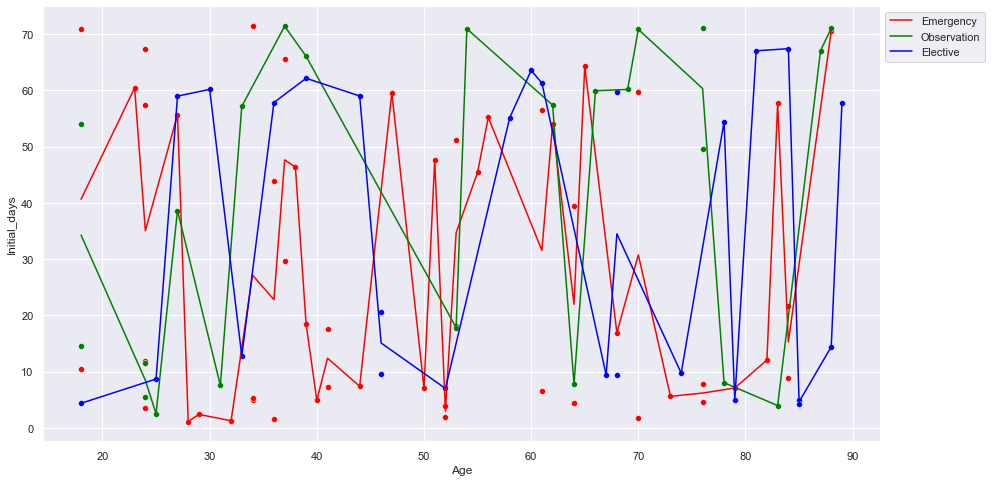

In [45]:
#Use scatterplot with lineplot to visualize any relationship between Age and Iniital_days against type of admission
ER = data[data["Initial_admin"]=='Emergency Admission']
OBS = data[data['Initial_admin']=='Observation Admission']
Elect = data[data['Initial_admin']=='Elective Admission']
sns.scatterplot(data=ER, x='Age', y="Initial_days", color="Red")
sns.scatterplot(data=OBS, x='Age', y="Initial_days", color="Green")
sns.scatterplot(data=Elect, x='Age', y="Initial_days", color="Blue")
sns.lineplot(data=ER, x='Age', y="Initial_days", ci=None,color="Red")
sns.lineplot(data=OBS, x='Age', y="Initial_days", ci=None, color="Green")
sns.lineplot(data=Elect, x='Age', y="Initial_days", ci=None, color="Blue")
plt.legend(labels=["Emergency","Observation", "Elective"], bbox_to_anchor=(1,1))

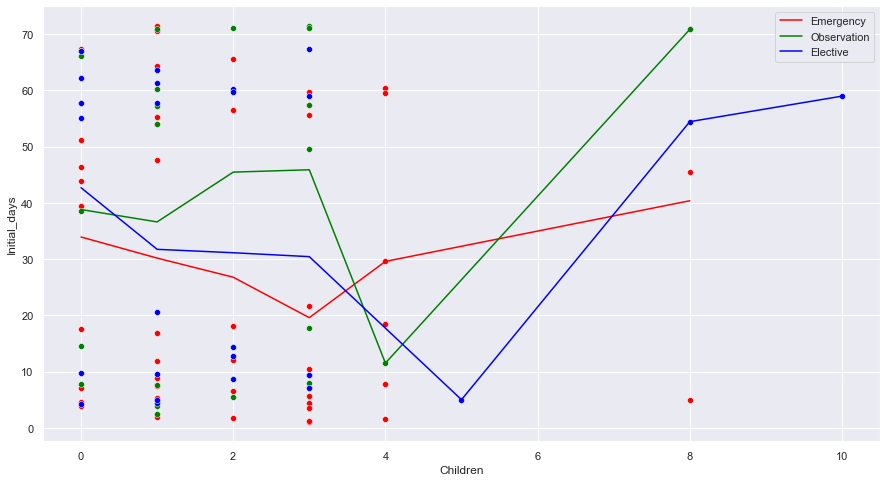

In [46]:
#Use scatterplot with lineplot to visualize any relationship between # of Children and Iniital_days against type of admission
ER = data[data["Initial_admin"]=='Emergency Admission']
OBS = data[data['Initial_admin']=='Observation Admission']
Elect = data[data['Initial_admin']=='Elective Admission']
sns.scatterplot(data=ER, x='Children', y="Initial_days", color="Red")
sns.scatterplot(data=OBS, x='Children', y="Initial_days", color="Green")
sns.scatterplot(data=Elect, x='Children', y="Initial_days", color="Blue")
sns.lineplot(data=ER, x='Children', y="Initial_days", ci=None,color="Red")
sns.lineplot(data=OBS, x='Children', y="Initial_days", ci=None, color="Green")
sns.lineplot(data=Elect, x='Children', y="Initial_days", ci=None, color="Blue")
plt.legend(labels=["Emergency","Observation", "Elective"], bbox_to_anchor=(1,1))

In [47]:
#First Ordinary Least Squares Model
mdl_A = ols("Initial_days ~ Initial_admin + Gender + HighBlood + Stroke + Reflux_esophagitis + Services + Children + Age + Allergic_rhinitis + Asthma + Anxiety + BackPain + Complication_risk + Overweight + Arthritis + Diabetes + Hyperlipidemia + 0", data=da_df).fit()
print(mdl_A.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.333
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.141
Time:                        17:47:01   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9978   BIC:                         9.395e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [48]:
#Second Ordinary Least Squares Model
mdl_B = ols("Initial_days ~ Initial_admin + Children + Age + Initial_admin:Age + Initial_admin:Children + Age:Children + 0", data=data).fit()
print(mdl_B.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.8264
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.594
Time:                        17:48:23   Log-Likelihood:                -464.93
No. Observations:                 100   AIC:                             949.9
Df Residuals:                      90   BIC:                             975.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [49]:
#Third Ordinary Least Squares Model. Eliminated variables with high p-value
mdl_C = ols("Initial_days ~ Initial_admin +  Age + 0", data=data).fit()
print(mdl_C.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.350
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.263
Time:                        17:48:29   Log-Likelihood:                -466.83
No. Observations:                 100   AIC:                             941.7
Df Residuals:                      96   BIC:                             952.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [50]:
#Modeling the strongest explanatory variable to the response variable alone
mdl_D = ols("Initial_days ~ Initial_admin + Children + 0", data=data).fit()
print(mdl_D.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.363
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.259
Time:                        17:49:31   Log-Likelihood:                -466.82
No. Observations:                 100   AIC:                             941.6
Df Residuals:                      96   BIC:                             952.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [51]:
#Find the mean of Initial_days of each category for variable “Initial_admin”
admin_summary_stats = data.groupby("Initial_admin")["Initial_days"].mean()
print(admin_summary_stats)

Initial_admin
Elective Admission       34.791712
Emergency Admission      28.552512
Observation Admission    41.061805
Name: Initial_days, dtype: float64


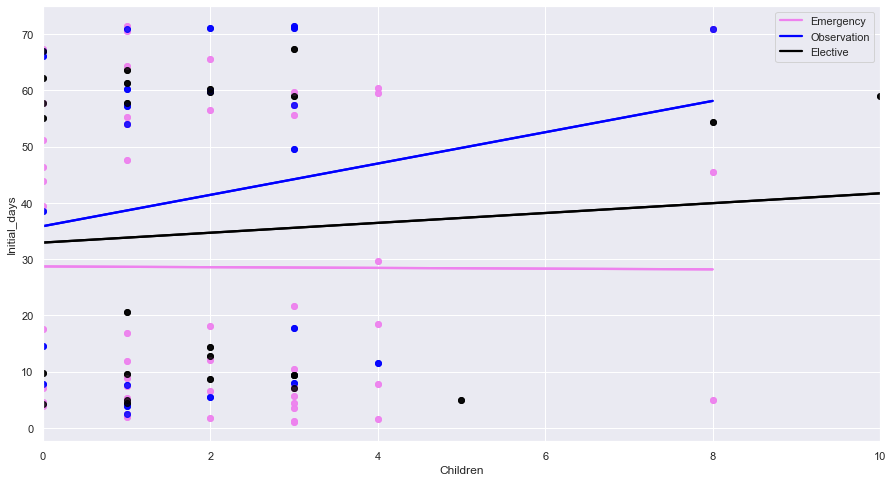

In [52]:
Emerg = data[data['Initial_admin']=='Emergency Admission']
Observ = data[data['Initial_admin']=='Observation Admission']
Elect = data[data['Initial_admin']=='Elective Admission']
sns.regplot(x="Children", y="Initial_days", data=Emerg, ci=None, color="violet")
sns.regplot(x="Children", y="Initial_days", data=Observ, ci=None, color="blue")
sns.regplot(x="Children", y="Initial_days", data=Elect, ci=None, color="black")
sns.regplot(x="Children", y="Initial_days", data=Emerg, ci=None, color="violet")
sns.regplot(x="Children", y="Initial_days", data=Observ, ci=None, color="blue")
sns.regplot(x="Children", y="Initial_days", data=Elect, ci=None, color="black")
plt.legend(labels=['Emergency','Observation', 'Elective'])
plt.show()

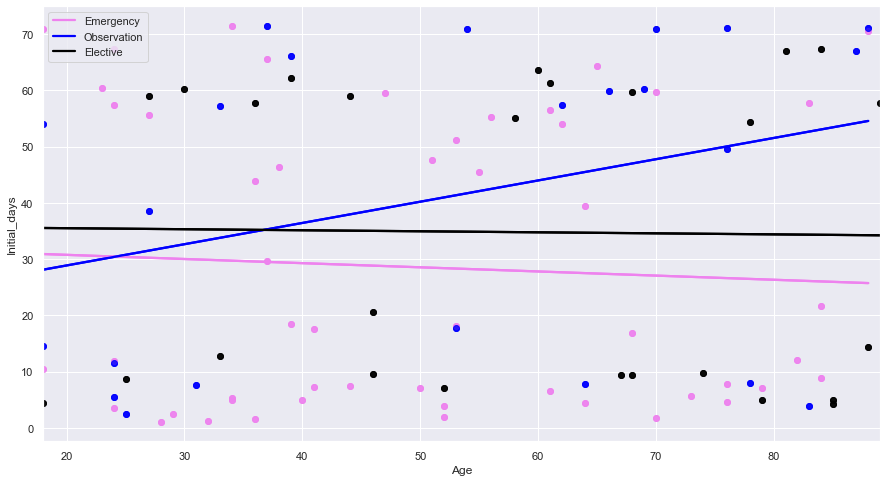

In [53]:
Emerg = data[data['Initial_admin']=='Emergency Admission']
Observ = data[data['Initial_admin']=='Observation Admission']
Elect = data[data['Initial_admin']=='Elective Admission']
sns.regplot(x="Age", y="Initial_days", data=Emerg, ci=None, color="violet")
sns.regplot(x="Age", y="Initial_days", data=Observ, ci=None, color="blue")
sns.regplot(x="Age", y="Initial_days", data=Elect, ci=None, color="black")
sns.regplot(x="Age", y="Initial_days", data=Emerg, ci=None, color="violet")
sns.regplot(x="Age", y="Initial_days", data=Observ, ci=None, color="blue")
sns.regplot(x="Age", y="Initial_days", data=Elect, ci=None, color="black")
plt.legend(labels=['Emergency','Observation', 'Elective'])
plt.show()

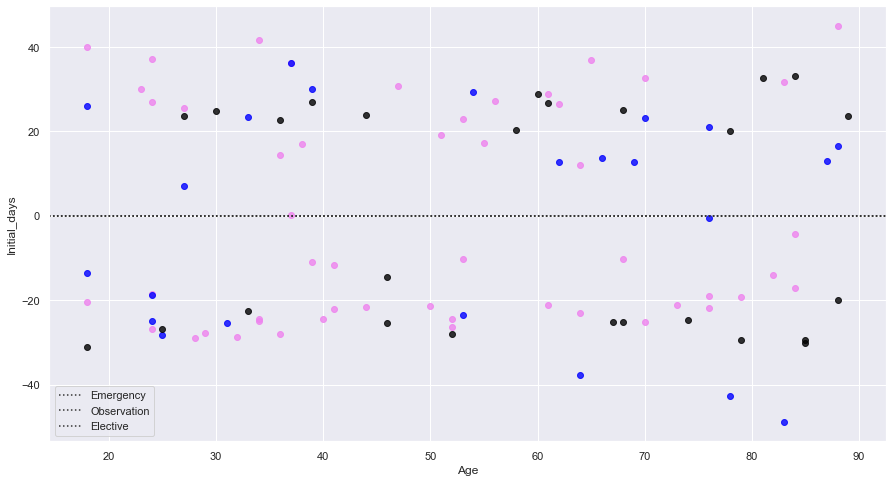

In [54]:
#Residual plots
Emerg = data[data['Initial_admin']=='Emergency Admission']
Observ = data[data['Initial_admin']=='Observation Admission']
Elect = data[data['Initial_admin']=='Elective Admission']
sns.residplot(x="Age", y="Initial_days", data=Emerg, color="violet")
sns.residplot(x="Age", y="Initial_days", data=Observ, color="blue")
sns.residplot(x="Age", y="Initial_days", data=Elect, color="black")
plt.legend(labels=['Emergency','Observation', 'Elective'])
plt.show()

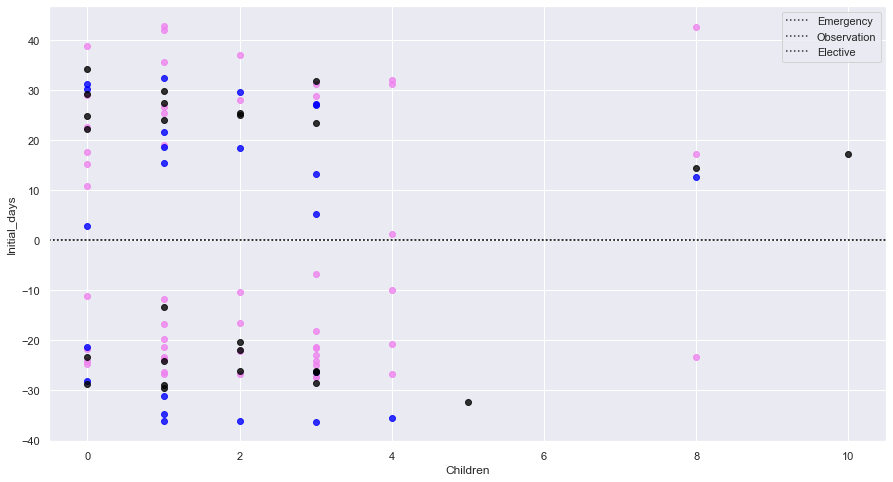

In [55]:
#Residual plots
Emerg = data[data['Initial_admin']=='Emergency Admission']
Observ = data[data['Initial_admin']=='Observation Admission']
Elect = data[data['Initial_admin']=='Elective Admission']
sns.residplot(x="Children", y="Initial_days", data=Emerg, color="violet")
sns.residplot(x="Children", y="Initial_days", data=Observ, color="blue")
sns.residplot(x="Children", y="Initial_days", data=Elect, color="black")
plt.legend(labels=['Emergency','Observation', 'Elective'])
plt.show()

In [56]:
#Export prepared data
data.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D208\medical_prepared_D208.csv")